#  "Fraud Detection Analysis"

<pre class="tab">                                                                                           Name : Shivesh Chaturvedi</pre>

## The task is  to develop a model for predicting fraudulent transactions for a financial company.

## Detail of Model and steps involved in it

### Steps involved in the process -     

<dl>
  <dt>1) Importing neccesssary libraries</dt>
  <dt>2) Dataset - Download the dataset</dt>
  <dt>3) Data Cleaning </dt>
      <dd> - In this step we need to check for missing values, and outlier treatment</dd>
      <dd> - Creation of Dummy variables and other neccessary actions required</dd>
  <dt>3) Exploratory Data Analysis </dt>
      <dd> - Understanding Dataset in detail and analysing summary statistics of each variable</dd>
      <dd> - Checking all variables and calculating how they are related to each other</dd>
      <dd> - Checking if any two variables are correlated to each other</dd>
      <dd> - Finding different characteristics of Fraud and non-fraud transactions</dd>
      <dd> - Calculating insights from the data - How Originator and Recipient are related, Which type of transaction is generating more number of Fraud transactions, How the Fraud transaction related with transaction amount, If fraud cases are at both ends or only at single end<dd>
    <dt>4) Feature Selection </dt>
        <dd> - Analysing every feature and checking which feature is significant for the classification <dd>
        <dd> - Features like isFlaggedFraud are not that useful so remove them<dd>
    <dt>5) Data Visualization<dt>
        <dd> - Knowing more about the data <dd>
        <dd> - Using plots to find data is balanced or not<dd>
        <dd> - Checking which type of transaction has occured more no of times<dd>    
</dl>
<h3> After all the steps , when you have perfectly clean and standardized data we go for model building</h3><br>
<dl>
    <dt>6) Model Selection and Training the model</dt>
        <dd> - Splitting the data by train_test_split or the best way to train and split is by using Cross Validation<dd>
        <dd> - Give the estimator or the model which you need to train on and no of folds in the cross_val_score function<dd>
        <dd> - We need to find Recall score so we give scoring='recall' in cross_val_score <dd>
        <dd> - Try it with every supervised model - Logistic, RandomForest, XgBoost <dd>
        <dd> - Model which gives a good score will be considered as our final model <dd>
    <dt>7) Checking Performance of model </dt>
        <dd> - Performance can be calculated using Confusion Matrix <dd>
    <dd> - Recall and Precision </dd>
    <dd> - Cross validation Score </dd>
    <dd> - Average Precision Score </dd>
</dl>


## Importing important libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os

In [ ]:
dt = pd.read_csv('G:/Datasets/Fraud.csv')

In [14]:
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Checking the shape of dataset

In [35]:
dt.shape

(6362620, 11)

#### we are having 6 million rows and 11 columns

## Data types of all features

In [16]:
dt.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

### Converting the isFraud variable to object bcoz that's our class variable

In [36]:
dt['isFraud'] = dt['isFraud'].astype('object')

In [20]:
dt.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud            object
isFlaggedFraud      int64
dtype: object

## Statistical values - mean, standard deviation, min, max

In [28]:
dt.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


## Above we have seen statistical values for numerical features, now for categorical we will see unique values, counts

In [30]:
dt['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [32]:
dt['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
C248609774     101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
C97730845       96
C977993101      96
C392292416      95
C1899073220     92
C306206744      91
C1234776885     90
C1782113663     90
C716083600      89
C998351292      89
C909295153      88
C1674899618     86
C667346055      86
C1262822392     85
C1816757085     84
C1255024717     84
C453211571      84
C2006081398     83
C932583850      82
C1504109395     82
C991363637      82
              ... 
M1116815198      1
M1270875610      1
M2020800444      1
M373224582       1
M1941990435      1
M549263937       1
M1770137702      1
M113285080       1
M1745809473      1
M104062446       1
M95432397        1
M2026789659      1
M693309864       1
M1054291378      1
M86054712        1
M1039492541      1
M753725613       1
C77191791        1
M1471919849      1
M1377742934      1
M48475455        1
M1373695294 

In [33]:
dt['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [38]:
dt['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

## Data Cleaning

## Finding if there are any missing values or not

In [40]:
dt.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

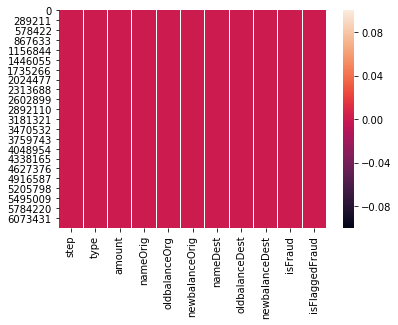

In [41]:
sns.heatmap(dt.isnull())

In [ ]:
# there are no missing values so we will move ahead for further analysis

## Now checking if data is balanced or imbalanced

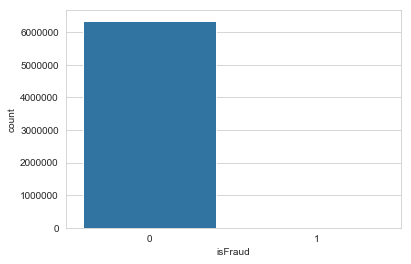

In [43]:
sns.set_style('whitegrid')
sns.countplot(dt['isFraud'])

In [329]:
# Data is Highly unbalanced 

In [330]:
# We can also verify this unbalanced data with value_counts
dt['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

## Correlation analysis

In [390]:
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [391]:
corr_data = dt.copy()

In [393]:
corr_data = corr_data.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1)

In [395]:
corr_data.loc[corr_data.type=='TRANSFER','type'] = 0
corr_data.loc[corr_data.type=='CASH_OUT', 'type'] = 1

In [397]:
corr_data.corr()      #checking the correlation among features

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,-0.016022,0.037007,0.005744,-0.011280,0.037778,0.037475
type,-0.016022,1.000000,-0.326040,-0.013202,0.018726,-0.099794,-0.157024
amount,0.037007,-0.326040,1.000000,0.120389,0.018296,0.307133,0.497027
oldbalanceOrg,0.005744,-0.013202,0.120389,1.000000,0.778826,-0.020403,-0.010029
newbalanceOrig,-0.011280,0.018726,0.018296,0.778826,1.000000,-0.012277,-0.015439
oldbalanceDest,0.037778,-0.099794,0.307133,-0.020403,-0.012277,1.000000,0.970060
newbalanceDest,0.037475,-0.157024,0.497027,-0.010029,-0.015439,0.970060,1.000000


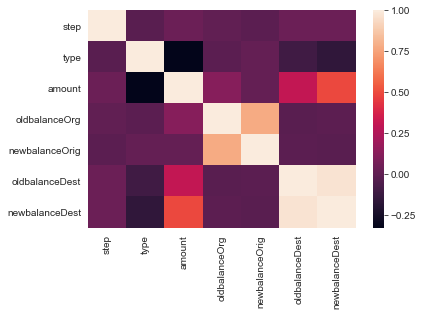

In [398]:
sns.heatmap(corr_data.corr())        
#draws a heatmap- positive value is for positive correlation, 0 is no correlation, negative value shows negative correlation
# we can see in the map, - oldbalancedest and newbalancedest having high correlation
# and oldbalanceOrig and newbalanceOrig having high correlation
# others having good correlation are - oldbalancedest and amount, newbalancedest and amount

In [403]:
corr_data['isFraud'] = corr_data['isFraud'].astype('int')

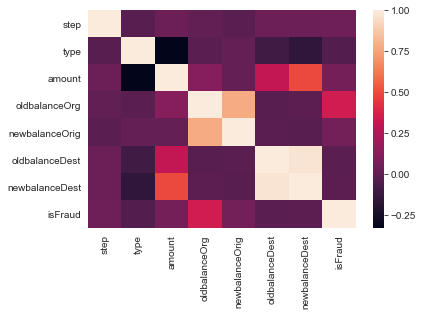

In [404]:
sns.heatmap(corr_data.corr())
# here we have to see which feature is having good correlation with isFraud, that feature will be significant for our analysis

## We need to now analyse type variable. We will see which type gives more fraud values

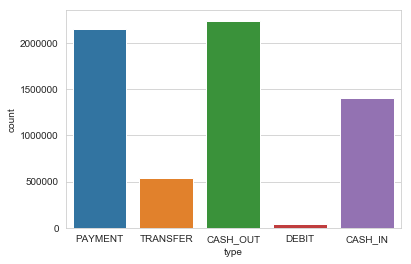

In [54]:
sns.countplot(dt['type'])

In [52]:
dt.loc[dt.isFraud == 1].type.drop_duplicates().values      #finding type which are resulting in fraud transactions

array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [53]:
# here we can see there are only 2 type which is Transfer and Cash_out which are giving fraudulant values

In [55]:
# Now if only 2 types are important for our analysis then we should just remove other types which are
# - Payment, Cash_in, Debit

In [56]:
dt = dt.loc[data['type'].isin(['CASH_OUT', 'TRANSFER']),:] 

In [57]:
dt.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [59]:
dt.shape

(2770409, 11)

In [60]:
# No of rows are reduced

In [63]:
dfTransfer = dt.loc[dt.type == 'TRANSFER']    #all rows having type transfer
dfisflagged = dt.loc[dt.isFlaggedFraud==1]      #checking isFlaggedFraud values

In [62]:
dfTransfer.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0


In [67]:
dfisflagged[["type","isFraud","isFlaggedFraud"]]

,type,isFraud,isFlaggedFraud
2736446,TRANSFER,1,1
3247297,TRANSFER,1,1
3760288,TRANSFER,1,1
5563713,TRANSFER,1,1
5996407,TRANSFER,1,1
5996409,TRANSFER,1,1
6168499,TRANSFER,1,1
6205439,TRANSFER,1,1
6266413,TRANSFER,1,1
6281482,TRANSFER,1,1


In [66]:
# In dfisflagged we can see that isFlaggedFraud is always 1 when isFraud is 1 and isFlaggedFraud is 1 when the type
# is Transfer.
# So I think isFlaggedFraud is just an extra feature which won't help me in future analysis
# In the later process I will delete this column

## Check for id of customer and receipent

In [68]:
# merchant id starts from 'M', and customer - 'C'

In [69]:
data = pd.read_csv('G:/Datasets/Fraud.csv')

In [75]:
print("IF there are any Transfer type which is having id as merchant : ")
print(data.loc[data.type=="TRANSFER"].nameOrig.str.contains('M').any())
print("or, what about Cash_out type (Cash_out means paying to the merchant :)")
print(data.loc[data.type=="CASH_OUT"].nameOrig.str.contains('M').any())

IF there are any Transfer type which is having id as merchant : 
False
or, what about Cash_out type (Cash_out means paying to the merchant :)
False


In [331]:
# this reveals that merchants are not in originators name id , merchants are present in recepients name id

## Account labels common to Fraudulent Transfer and Cash_outs

In [76]:
dtFraudTransfer = dt.loc[(dt.isFraud == 1) & (dt.type == 'TRANSFER')]     
dtFraudCashout = dt.loc[(dt.isFraud == 1) & (dt.type == 'CASH_OUT')]

In [79]:
print("If there are common accounts which are fraud in (Transfer,nameDest) and (CashOut,nameOrig):")
dtFraudTransfer.nameDest.isin(dtFraudCashout.nameOrig).any()     #checking if after the fraudulent transfer when the fraudster goes for cash_out that money, he then gets cheated back, but this is such a rare case

If there are common accounts in Transfer,nameDest and CashOut,nameOrig :


False

In [87]:
dtisnotFraud = dt.loc[dt.isFraud==0]   # Transactions which are not fraud
dtisnotFraudCashout = dtisnotFraud.loc[dtisnotFraud.type == 'CASH_OUT']    #Transaction which are not fraud and Cash_out type

In [89]:
print("If there are common accounts which are not fraud in (Transfer,nameDest) and (CashOut,nameOrig):")
dtFraudTransfer.nameDest.isin(dtisnotFraudCashout.nameOrig).any() 
#checking if after the fraudulent transfer the fraudster goes for cash_out that money

If there are common accounts which are not fraud in (Transfer,nameDest) and (CashOut,nameOrig):


True

In [93]:
dtFraudTransfer.loc[dtFraudTransfer.nameDest.isin(dtisnotFraudCashout.nameOrig)].drop_duplicates()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0


## Transactions amount analysis

In [95]:
sum(dt['amount']<0)         #it gives how many acounts having negative transaction amount

0

In [96]:
sum(dt['amount']==0)          #it gives how many acounts having 0 transaction amount

16

In [102]:
dtisFraud = dt.loc[dt.isFraud==1] 
dtfraudwith0amount = dtisFraud.loc[dt.amount ==0]    #it gives transactions which are fruad and having transaction amount 0
dtfraudwith0amount.shape

(16, 11)

In [103]:
#  We can clearly see that no of transaction having 0 transaction amount is same as no of fraud transaction having transaction amount 0
# So we can assume that if transaction amount comes out 0 then transaction is fraud  

## Till now we have analysed most of the features

## Removing unneccessary features

In [125]:
dt.head()
X = dt.copy()
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [126]:
Y = dt['isFraud']          #thats our target variable

In [127]:
#In furhter analysis we don't need some features which are - nameOrig, nameDest, isFlaggedFraud 
#so we will drop these columns

In [128]:
X = X.drop(['isFraud','nameOrig','nameDest','isFlaggedFraud'], axis = 1)

In [129]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89


## Changing type feauture to binary

In [130]:
X.loc[X.type=='TRANSFER','type'] = 0

In [131]:
X.loc[X.type=='CASH_OUT', 'type'] = 1

In [132]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [133]:
X.type = X.type.astype(int)

In [134]:
X.dtypes

step                int64
type                int32
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
dtype: object

## Abhi errorBalance nhi kr rhe ...last me accuracy kam hui to krenge

## Scaling the data using StandardScaler

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
SC = StandardScaler()

In [145]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [144]:
Y.head()

2     1
3     1
15    0
19    0
24    0
Name: isFraud, dtype: object

In [149]:
X_scale = X.copy()

In [152]:
SC.fit(X_scale)         #fit all the data in the function

StandardScaler(copy=True, with_mean=True, with_std=True)

In [153]:
X_scaling = SC.transform(X_scale)          #scale the fitted data

In [154]:
X_scaling
#results in an numpy array, we can then convert back to dataframe

array([[-1.70180474, -2.04906151, -0.35746665, ..., -0.10638868,
        -0.40315492, -0.43825939],
       [-1.70180474,  0.4880283 , -0.35746665, ..., -0.10638868,
        -0.39814208, -0.43825939],
       [-1.70180474,  0.4880283 , -0.09957563, ..., -0.10638868,
        -0.401952  , -0.42724516],
       ...,
       [ 3.53760156,  0.4880283 ,  6.75145759, ..., -0.10638868,
        -0.38694665,  0.92584427],
       [ 3.53760156, -2.04906151,  0.59976648, ..., -0.10638868,
        -0.40315492, -0.43825939],
       [ 3.53760156,  0.4880283 ,  0.59976648, ..., -0.10638868,
         1.13749648,  1.1354243 ]])

In [155]:
X_scaled = pd.DataFrame(X_scaling , columns= ['step','type','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'])

In [156]:
X_scaled.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-1.701805,-2.049062,-0.357467,-0.188847,-0.106389,-0.403155,-0.438259
1,-1.701805,0.488028,-0.357467,-0.188847,-0.106389,-0.398142,-0.438259
2,-1.701805,0.488028,-0.099576,-0.128591,-0.106389,-0.401952,-0.427245
3,-1.701805,-2.049062,-0.115146,-0.186762,-0.106389,-0.397848,-0.438259
4,-1.701805,-2.049062,-0.006590,-0.146456,-0.106389,-0.401672,0.143134


In [210]:
Y=Y.astype('int')     #converting the Y type from object to int, bcoz we can't apply model on object type
Y.dtypes

dtype('int32')

## Splitting the data into train and test

In [166]:
from sklearn.model_selection import train_test_split

In [211]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, random_state = 5,test_size = 0.3) #if less accuracy ry changing random state

In [212]:
x_train.shape, y_train.shape

((1939286, 7), (1939286,))

In [213]:
x_test.shape, y_test.shape

((831123, 7), (831123,))

## Checking value counts of isFraud for x_train and x_test to see if dataset is equally distributed or not

In [214]:
countTrain = list(y_train.value_counts())

In [215]:
countTest = list(y_test.value_counts())

In [216]:
countTrain[0]/countTrain[1], countTest[0]/countTest[1]

(341.32762577228596, 325.186420722135)

In [187]:
# Here we can see they are equally distributed 

## Now coming to model implementation - First checking with -
## Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [218]:
logistic = LogisticRegression()
logistic.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##  Using cross validation to make sure the model don't overfit the training data

In [222]:
cross_val_score(LogisticRegression(), X_scaled, Y)      #default - scoring-'accuracy', but we need recall
#gives the cross_validation score upto 3 folds, we can average them to get a final score

array([0.99803134, 0.99835728, 0.99741735])

In [221]:
cross_val_score(RandomForestClassifier(), X_scaled, Y)

array([0.99812013, 0.96847434, 0.0063229 ])

## We are checking for recall bcoz of type 2 error

In [223]:
cross = cross_val_score(LogisticRegression(), X_scaled, Y, cv=10, scoring='recall')

In [224]:
cross       #Here we are getting a very low recall, we need to increase this, we will then use Random Forest

array([0.33941606, 0.44160584, 0.43673966, 0.41778319, 0.46285018,
       0.49695493, 0.5408039 , 0.50182704, 0.51522533, 0.79780755])

## <li> In imbalanced datasets, the goal is to improve recall without hurting precision.</li>

In [236]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [234]:
y_pred = cross_val_predict(LogisticRegression(), X_scaled, Y, cv=10)

In [231]:
y_pred.shape, Y.shape

((2770409,), (2770409,))

In [235]:
confusion_matrix(Y, y_pred)

array([[2761373,     823],
       [   4147,    4066]], dtype=int64)

In [238]:
print(classification_report(Y, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00   2762196
          1       0.83      0.50      0.62      8213

avg / total       1.00      1.00      1.00   2770409



In [241]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [240]:
precision_score(Y, y_pred, average='binary')

0.831662916751892

In [322]:
recall_score(Y, y_pred, average='binary')

0.49506879337635457

In [323]:
# here we are getting very low recall which should be high, so we will go for next model that is - Random forest

## Random Forest Classifier

In [334]:
cross_score = cross_val_score(RandomForestClassifier(), X_scaled, Y, cv=5, scoring='recall')

In [336]:
cross_score

array([0.53682288, 0.69993914, 0.69567864, 0.75517661, 1.        ])

In [337]:
cross_score = cross_val_score(RandomForestClassifier(), X_scaled, Y, cv=StratifiedKFold(5), scoring='recall')

In [338]:
cross_score

array([0.4729154 , 0.7108947 , 0.70419963, 0.76065773, 1.        ])

In [340]:
y_pred = cross_val_predict(RandomForestClassifier(), X_scaled, Y, cv=StratifiedKFold(5))

In [342]:
confusion_matrix(Y, y_pred)

array([[2210497,  551699],
       [   1976,    6237]], dtype=int64)

In [343]:
recall_score(Y, y_pred, average='binary')

0.7594058200413978

In [344]:
# Here we can see we are having a high recall score compare to Logistic Regression model

## Applying XgBoost classifier 

In [379]:
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

In [356]:
cross_val_score(XGBClassifier(max_depth = 3, n_jobs = 4), X_scaled, Y, cv=StratifiedKFold(5), scoring='recall')

C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:03:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:05:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:07:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:10:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([0.66159464, 0.70541692, 0.64698722, 0.74360536, 1.        ])

In [357]:
y_pred = cross_val_predict(XGBClassifier(max_depth = 3, n_jobs = 4), X_scaled, Y, cv=StratifiedKFold(5))

C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:48:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:50:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:52:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:56:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [358]:
y_pred

array([1, 0, 0, ..., 1, 1, 1])

In [359]:
confusion_matrix(Y, y_pred)

array([[2680985,   81211],
       [   2041,    6172]], dtype=int64)

In [360]:
recall_score(Y, y_pred, average='binary')

0.7514915378059175

## XgBoost using Average Precision Score

In [366]:
x_train.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2054139,0.628389,0.488028,-0.219345,-0.189568,-0.106389,-0.368483,-0.380677
1828766,0.437737,0.488028,-0.335846,-0.157406,-0.106389,-0.243799,-0.290143
1371728,-0.042424,0.488028,-0.224761,-0.189054,-0.106389,-0.299303,-0.319203
956447,-0.402545,0.488028,-0.091058,-0.189568,-0.106389,0.059576,0.030416
2530505,1.122673,0.488028,-0.350123,-0.189568,-0.106389,0.112071,0.028668


In [367]:
x_test.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
1114450,-0.261321,0.488028,-0.286434,-0.189568,-0.106389,0.035530,-0.028396
669601,-0.628503,0.488028,-0.147389,1.346682,1.211987,0.102130,0.058170
481521,-0.790911,0.488028,-0.224317,-0.185338,-0.106389,2.590572,2.291816
2666127,1.998261,0.488028,-0.322452,-0.189568,-0.106389,0.514171,0.397208
357400,-1.426418,0.488028,-0.026359,1.611192,0.941118,-0.350286,-0.327604


In [361]:
XGB = XGBClassifier(max_depth = 3, n_jobs = 4)

In [362]:
prob = XGB.fit(x_train, y_train)

C:\Users\Hp\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [369]:
y_pred = prob.predict_proba(x_test)
y_pred = y_pred[:,1]
y_pred

array([3.6081133e-06, 1.8940731e-05, 2.3801351e-06, ..., 4.4622125e-06,
       6.0548459e-06, 6.8300182e-08], dtype=float32)

In [377]:
print('AP score = {}'.format(average_precision_score(y_test, y_pred)))

AP score = 0.9579937017059694


In [378]:
# AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, 
#with the increase in recall from the previous threshold

## We have completed all the steps and found a good model for prediction

### How did you select variables to be included in the model?
<p>This comes under feature selection process. We do so by applying correlation, feature engineering, statistics </p>
<h3> Demonstrate the performance of the model by using best set of tools.</h3>
<ul>
    <li> Confusion Matrix</li>
    <li> Recall</li>
    <li> average_precision_score</li>
    <li> Cros_val_score</li>
</ul>
<h3> What are the key factors that predict fraudulent customer? </h3>
<ul>
    <li> Transaction Amount </li>
    <li> Transfer and Cash_out type transactions </li>
    <li> Merchant presence </li>
    <li> Error balance of originator and recepient </li>
</ul>
<h3> Do these factors make sense? If yes, How? If not, How not? </h3>
<p> Yes these factors definitely makes sense </p>
<ul>
    <li> Transaction amount - In analysis phase we found out that if transaction amount is 0 then the transaction is Fraud</li>
    <li> Transfer and Cash_out transactions - Checking out some insights we get to know that all the fraudulant transactions are either Transfer or Cash_out.
    <li> Error balance - We can use error balance that comes from - amount+newbalance-oldbalance, this plays a significant role in analysis
</ul>
<h3> What kind of prevention should be adopted while company update its infrastructure? </h3>
<ul>
    <li> We know that the data is highly imbalanced, so taking this into consideration, company should watch out performance measures very carefully, if performance is not analysed acurately then that will results in a great flaw </li>
    <li> Recall and Precision should be used </li>
    <li> Under sampling or SMOTE(Synthetic Minority Over-sampling Technique), company can use SMOTE as it is used to oversample the minority classes.</li>
    <li> In this type of Fraudulant analysis, company should use techniques which uses collection of results like - RandomForestClassifier, Boosting Techniques like - XgBoost etc.</li>
    <li> Always do hyperparameter tuning, try out different models and apply hyperparameter tuning on them.</li>
</ul>    
<h3> Assuming these actions have been implemented, how would you determine if they work? </h3>
<ul>
    <li> First testing with our own data </li>
    <li> If you have trained the model with cross validation and getting a score in performance then it will definitely work</li>
    <li> By giving one fraud transaction as a testing data, the model must predict it as a fraud </li>
</ul>

### Thank you